In [4]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [5]:
def toInt(a):
    return [int(x) for x in a]

In [159]:
def hist(a):
    k = round(1 + math.log(a.size, 2))
    delta =  int(((a[-1] - a[0]) + k - (a[-1] - a[0]) % k)/k)
    segments = []
    for i in [a[0] + j * delta for  j in range(k)]:
        segments.append(i)
    segments.append(a[0] + k * delta)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    
    hist, bins= np.histogram(a, bins = segments)
    center = (bins[:-1] + bins[1:]) / 2
    width = 1
    hist = [x / delta/a.size for x in hist]
    plt.bar(center, hist, align='center', width=width, color = 'lightblue' ,edgecolor = 'black')
    plt.xlim(segments[0] - 1, segments[-1] + 1)
    plt.grid(True)
    plt.xticks(segments)
    
    plt.show()

In [202]:
def bootStrap(a):
    alpha = []
    for i in range(1000):
        al = 0
        for j in range(a.size):
            al += a[rnd.randint(0, a.size - 1)]
        alpha.append(al / a.size)
    hist(np.sort(np.array(alpha)))

In [193]:
def median(a):
    x = 0;
    for i in a:
        x += i
    return x / a.size

In [194]:
def reach(a):
    b = a[-1] - a[0]
    return b

In [195]:
def mode(a):
    d = {}
    for i in a:
        if(d.get(i) == None):
            d[i] = 1
        else:
            d[i] = d[i] + 1
    max = d[a[0]]
    for i in d.values():
        if(max < i):
            max = i
    answ = []
    for i in d.items():
        if(i[1] == max):
            answ.append(i[0])
    return answ

In [196]:
def eDistribution(a):
    newData = []
    for i in a:
        k = 0;
        for j in range(a.size):
            k += 1 if a[j] < i else 0
        newData.append(k/a.size)
    
    width = []
    for i in range(len(a) - 1):
        width.append(a[i + 1] - a[i])
    width.append(0.8)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    plt.bar(a, newData, align='edge', width = width, color = 'lightblue')
    plt.xlim(a[0] - 0.1, a[-1] + 0.3 )
    plt.grid(True)
    plt.show()
    
    return "Эмпирическая фнунция распределения - F(y) = (1/" + str(a.size) + ") * sum(i = 1, " + str(a.size) + ")(I(X[i] < y))"

[0.02092286 2.64106075 0.13022098 1.82943934 2.01108865 0.93077915
 1.28625945 0.11030427 0.9246092  1.46937586 2.89998615 0.06720076
 0.15581026 0.15024316 2.98820136 0.81482919 0.23807347 0.05696713
 0.49628476 1.34356531 2.68715007 0.6438073  1.72227145 2.32501514
 0.24446264]


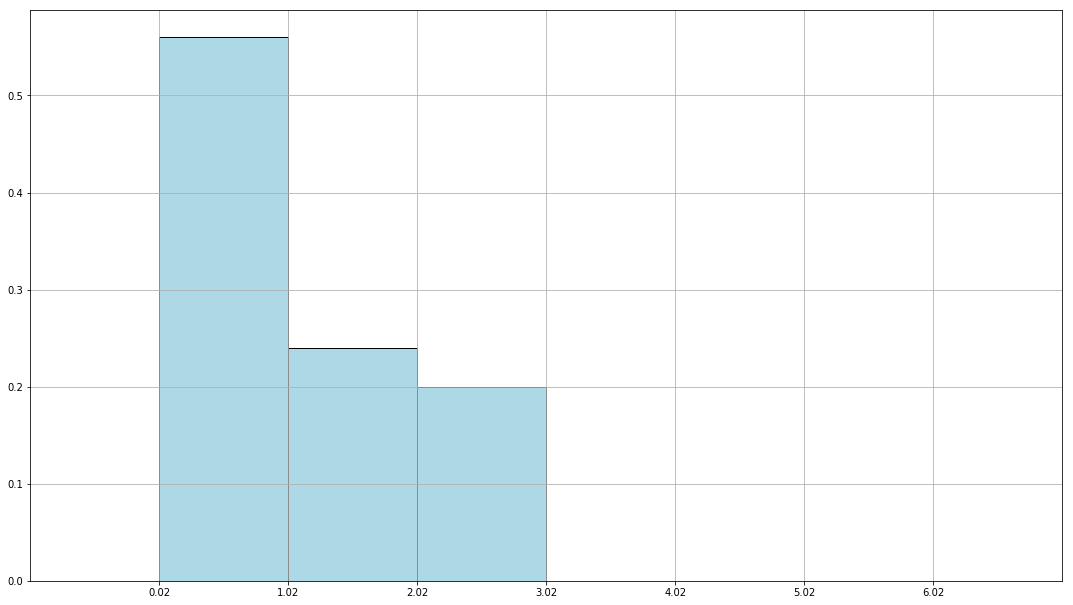

In [205]:
exp = np.array([])
for i in range (25):
    exp = np.append(exp, rnd.expovariate(1))
print(exp)
hist(np.sort(exp))

In [206]:
print("-------------------------------------------------------------------")
print("Моды : ")
print(mode(exp))
print("-------------------------------------------------------------------")
print("Медиана - ", median(exp))
print("Размах - ", reach(np.sort(exp)))
print("Кэффициент ассиметрии - ", 5)

-------------------------------------------------------------------
Моды : 
[0.020922862533257088, 2.641060753423849, 0.13022098314641023, 1.8294393440442591, 2.0110886467928903, 0.9307791484373676, 1.2862594456525427, 0.11030426561144933, 0.9246091986611538, 1.4693758628978313, 2.899986154791732, 0.0672007585639096, 0.15581025908809648, 0.15024316217343775, 2.988201361991277, 0.8148291922184804, 0.2380734721810444, 0.05696713377545236, 0.49628476405955296, 1.343565312656045, 2.6871500741866656, 0.6438073044903747, 1.7222714531811296, 2.325015144755502, 0.24446264013094698]
-------------------------------------------------------------------
Медиана -  1.127517147977786
Размах -  2.96727849945802
Кэффициент ассиметрии -  5


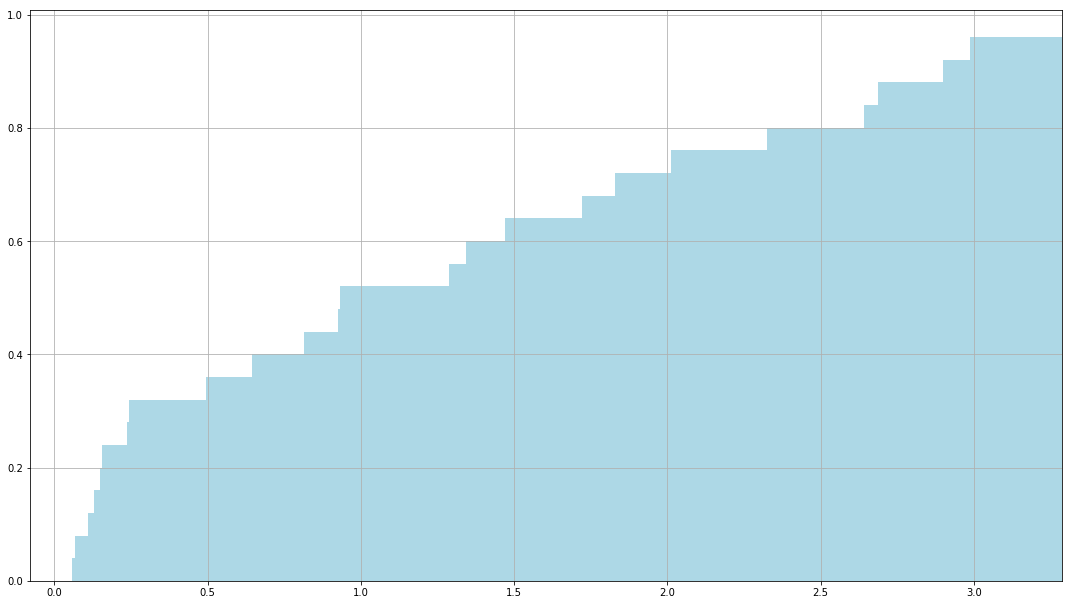

Эмпирическая фнунция распределения - F(y) = (1/25) * sum(i = 1, 25)(I(X[i] < y))


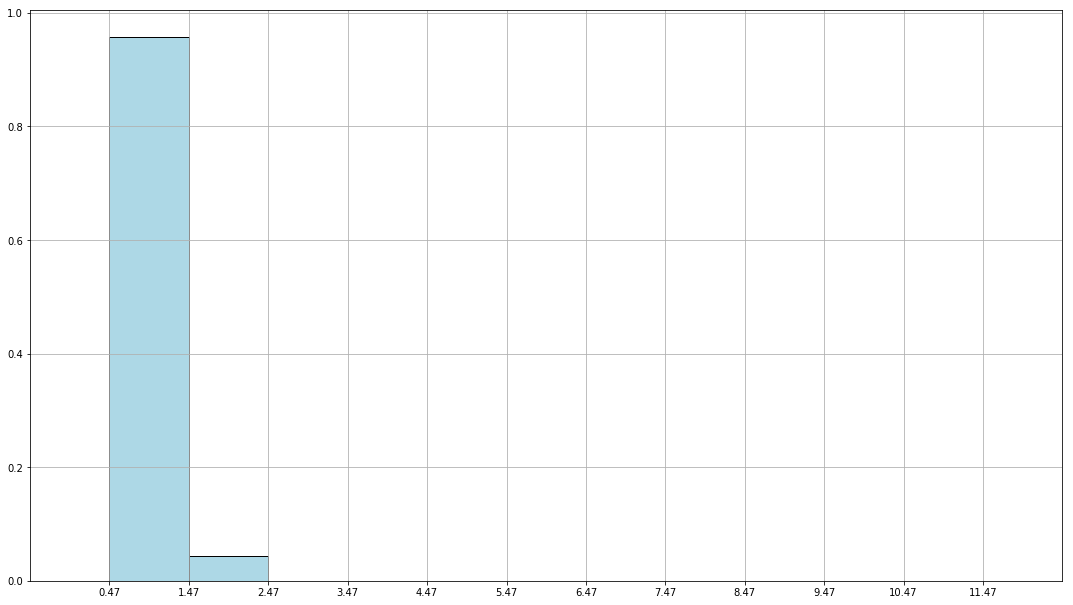

In [207]:
print(eDistribution(np.sort(exp)))
bootStrap(np.sort(exp))